In [6]:
#Melanoma (mel)
#Benign keratosis-like lesions (bkl) 
#Basal cell carcinoma (bcc) 
#Actinic keratoses (akiec) 
#Vascular lesions (vas) 
#Dermatofibroma (df)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os 
from glob import glob 
from PIL import Image
import seaborn as sns


In [5]:
np.random.seed(42)
from keras.utils.np_utils import to_categorical 
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import autokeras as ak

ModuleNotFoundError: No module named 'tensorflow'

In [7]:
#reading the metadata csv file
skin_df = pd.read_csv('/Users/harshvardhansingh/Downloads/archive/HAM10000_metadata.csv')

In [15]:
#read images based on the image ID from the metadata
image_path = {os.path.splitext(os.path.basename(x))[0]: x
    for x in glob (os.path.join('/Users/harshvardhansingh/Downloads/archive/', '*' , '*.jpg' ))}

#Define the path and add as a new column
skin_df['path'] = skin_df['image_id'].map(image_path.get)
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/Users/harshvardhansingh/Downloads/archive/HAM...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/Users/harshvardhansingh/Downloads/archive/HAM...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/Users/harshvardhansingh/Downloads/archive/HAM...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/Users/harshvardhansingh/Downloads/archive/HAM...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/Users/harshvardhansingh/Downloads/archive/HAM...
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,/Users/harshvardhansingh/Downloads/archive/HAM...
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,/Users/harshvardhansingh/Downloads/archive/HAM...
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,/Users/harshvardhansingh/Downloads/archive/HAM...
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,/Users/harshvardhansingh/Downloads/archive/HAM...


In [17]:

#Use the path to read images.
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))
print (skin_df ['dx'].value_counts())
n_samples = 5  #number of samples for plotting



nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [18]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/Users/harshvardhansingh/Downloads/archive/HAM...,"[[[191, 152, 192], [194, 154, 193], [196, 152,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/Users/harshvardhansingh/Downloads/archive/HAM...,"[[[24, 14, 29], [56, 39, 64], [106, 80, 112], ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/Users/harshvardhansingh/Downloads/archive/HAM...,"[[[190, 136, 150], [199, 145, 161], [200, 141,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/Users/harshvardhansingh/Downloads/archive/HAM...,"[[[35, 18, 28], [83, 51, 64], [128, 88, 103], ..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/Users/harshvardhansingh/Downloads/archive/HAM...,"[[[155, 110, 135], [188, 139, 168], [210, 157,..."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,/Users/harshvardhansingh/Downloads/archive/HAM...,"[[[181, 164, 179], [179, 162, 176], [180, 163,..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,/Users/harshvardhansingh/Downloads/archive/HAM...,"[[[4, 5, 3], [24, 22, 21], [101, 88, 88], [128..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,/Users/harshvardhansingh/Downloads/archive/HAM...,"[[[132, 119, 120], [157, 139, 138], [177, 158,..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,/Users/harshvardhansingh/Downloads/archive/HAM...,"[[[160, 123, 144], [163, 131, 152], [166, 128,..."


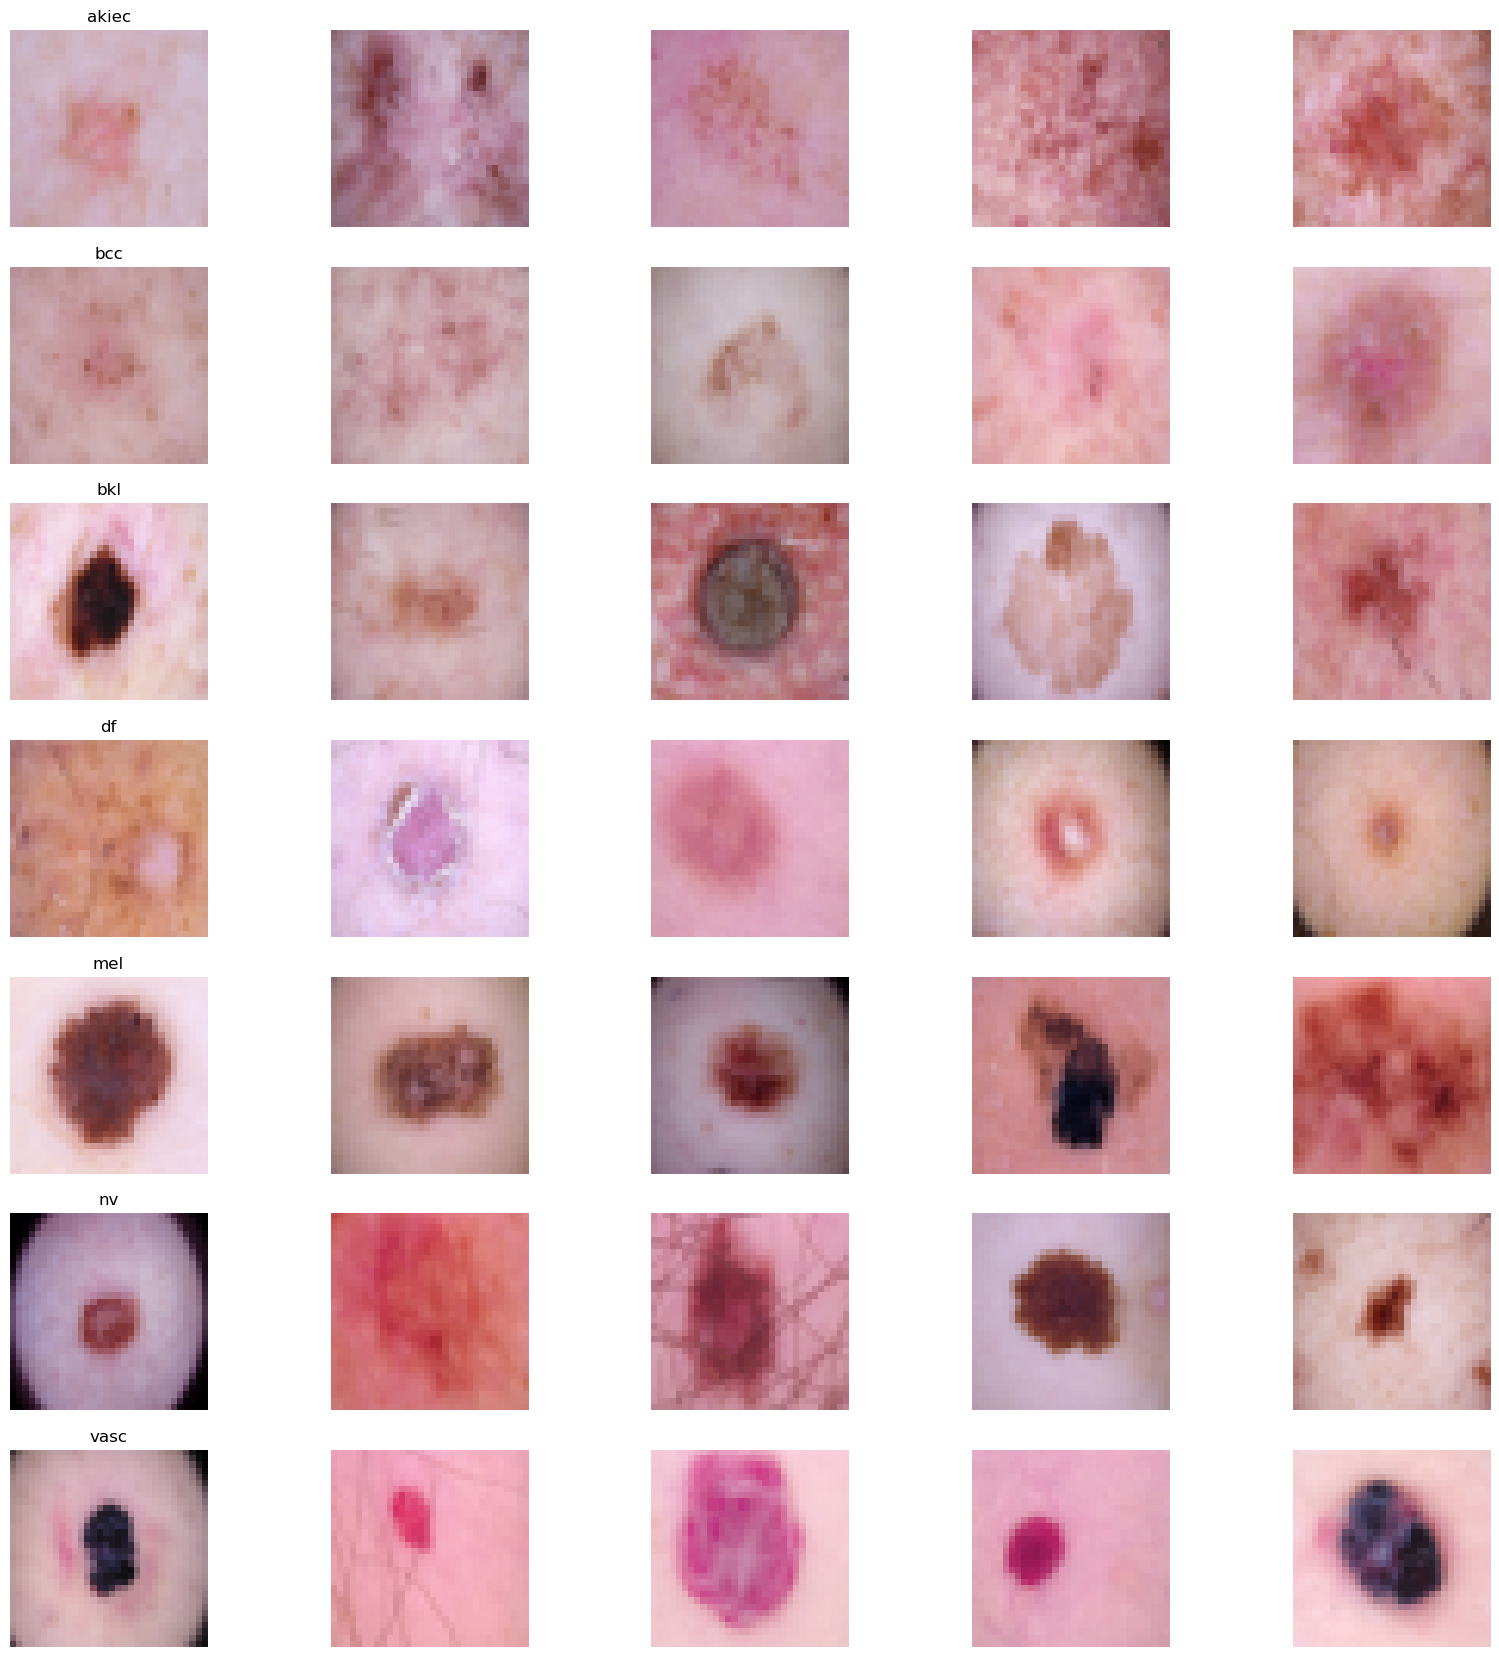

In [19]:
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')